In [12]:
!wget https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_2.tif

--2025-10-01 16:45:30--  https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_2.tif
Resolving github.com (github.com)... 4.228.31.150
Connecting to github.com (github.com)|4.228.31.150|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif [following]
--2025-10-01 16:45:30--  https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_2.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122951 (120K) [image/tiff]
Saving to: ‘heliponto_2.tif’

heliponto_2.tif     100%[===================>] 120.07K  --.-KB/s    in 0.01s   

2025-10-01 16:45:30 (10.3 MB/s) - ‘heliponto_2.tif’ saved [122951/122951]



In [13]:
!pip install rasterio numpy pandas matplotlib
import rasterio as rio
import pandas as np

  Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
Using cached matplotlib-3.10.6-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 8.7 MB/s eta 0:00:00:00:0100:01
Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_

In [14]:
with rio.open('heliponto_2.tif') as rio_raster:
    rio_matrix = rio_raster.read(1)
rio_matrix

array([[  0, 148, 160, ...,  83,  76,   0],
       [  0,  48,  89, ...,  74,  74,   0],
       [  0,  51,  57, ...,  77,  71,   0],
       ...,
       [  0,  55,  50, ...,  84, 180,   0],
       [  0,  51,  58, ..., 123, 115,   0],
       [  0,  55,  57, ..., 111,  99,   0]], shape=(334, 359), dtype=uint8)

In [15]:
import numpy as np

average_kernel = 0.00444 * np.ones((15,15))
average_kernel

array([[0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444],
       [0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444],
       [0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444],
       [0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444],
       [0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444],
       [0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444, 0.00444,
        0.00444],
       [0.00444, 0.00444, 0.00444, 0.004

In [16]:
# kernel dimensions
k_height, k_width = average_kernel.shape
pad_h = k_height // 2
pad_w = k_width // 2

# Padding in the image (with zeros on the edges to maintain size)
padded_image = np.pad(rio_matrix, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=np.random.randint(0, 150))

# Output matrix with the same size as the original
output = np.zeros_like(rio_matrix, dtype=np.float32)

# Manual convolution
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        # Extracts the image region of the kernel size
        region = padded_image[i:i+k_height, j:j+k_width]

        # Multiply element by element (weighted sum)
        weighted_sum = np.sum(region * average_kernel)

        # Assigns the result to the output image
        output[i, j] = weighted_sum

output


array([[45.85188, 45.96732, 46.0428 , ..., 56.49012, 55.19364, 53.86608],
       [45.43008, 45.51888, 45.56772, ..., 58.52808, 56.8986 , 55.22028],
       [45.07488, 45.1548 , 45.2436 , ..., 60.97452, 59.19408, 57.24048],
       ...,
       [48.82224, 49.64808, 50.4828 , ..., 48.37824, 48.58248, 49.01316],
       [48.42264, 49.15968, 49.9056 , ..., 46.92192, 47.25048, 47.87652],
       [48.03636, 48.67572, 49.31952, ..., 46.21596, 46.5312 , 47.19276]],
      shape=(334, 359), dtype=float32)

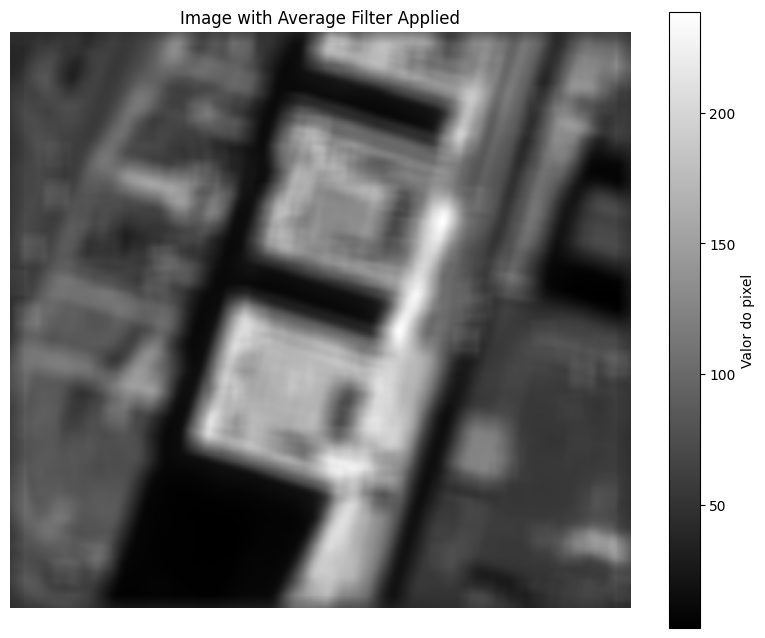

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(output, cmap='gray')
plt.title('Image with Average Filter Applied')
plt.colorbar(label='Valor do pixel')
plt.axis('off')
plt.show()


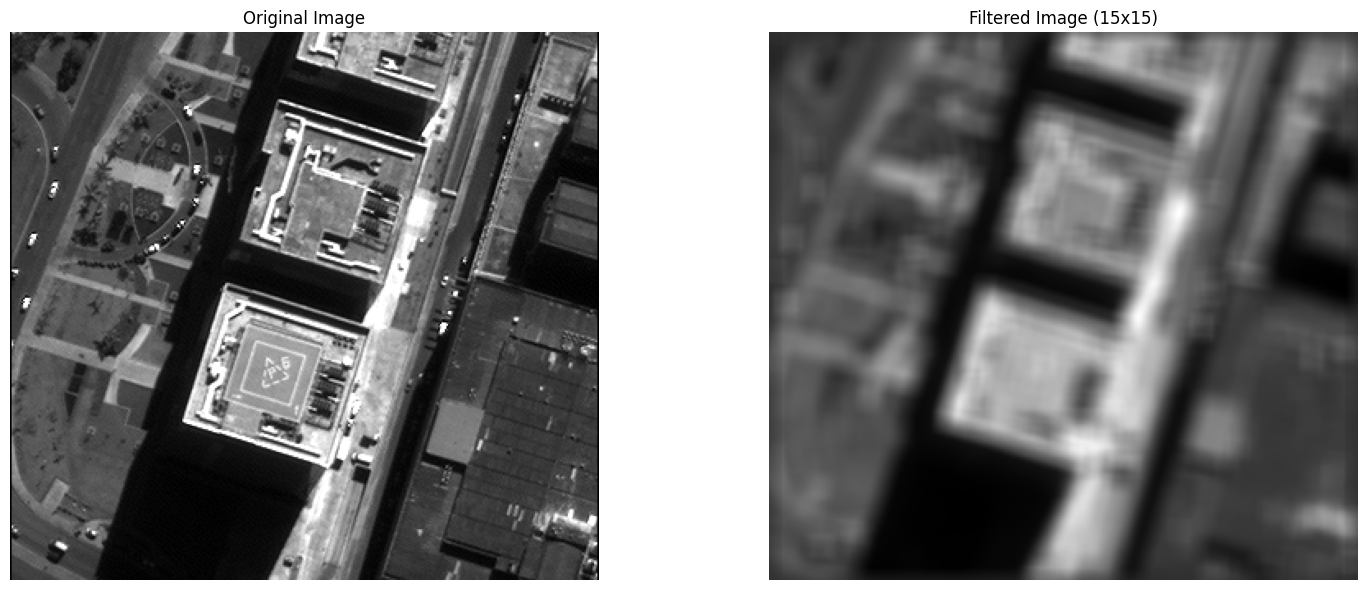

In [18]:
plt.figure(figsize=(16, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(rio_matrix, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Filtered Image (15x15)')
plt.axis('off')

plt.tight_layout()
plt.show()


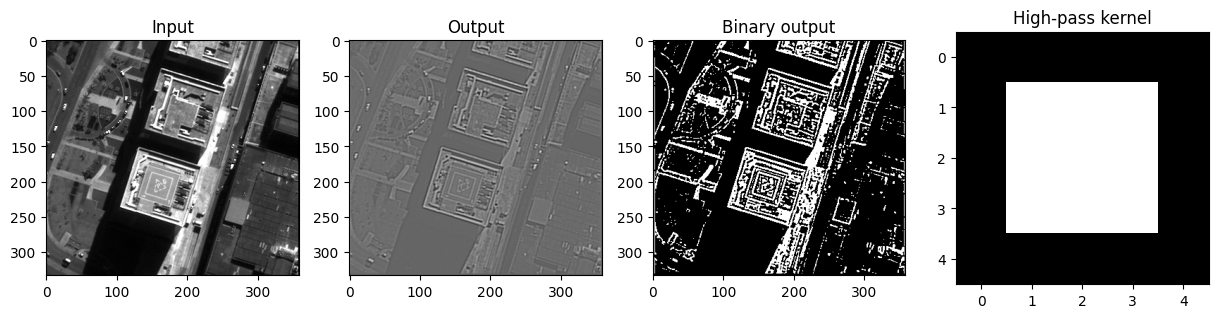

In [19]:
import numpy as np

input_matrix = rio_matrix
Height = input_matrix.shape[0]
Width = input_matrix.shape[1]

# define kernel and its flattened version
# to be used in convolution
high_pass_kernel = np.array([[-1, -1, -1, -1, -1],
                             [ -1,  2,  2, 2, -1],
                             [-1,  2,  2,  2, -1],
                             [-1, 2, 2,  2,  -1],
                             [-1, -1, -1, -1, -1]])
high_pass_kernel_flatten = high_pass_kernel.flatten()

# parameters
kernel_height = high_pass_kernel.shape[0]
kernel_width = high_pass_kernel.shape[1]
N = kernel_height * kernel_width
half_kernel_height = kernel_height // 2
half_kernel_width = kernel_width // 2

# create convolution matrix with zeros and
# the same size of input_matrix
conv_matrix = np.zeros_like(input_matrix).astype(int)
for row in range(half_kernel_height, Height - half_kernel_height):
  for column in range(half_kernel_width, Width - half_kernel_width):
    sub_matrix = input_matrix[row - half_kernel_height : row + half_kernel_height + 1,
                              column - half_kernel_width : column + half_kernel_height + 1]
    conv_matrix[row, column] = np.dot(sub_matrix.flatten(), high_pass_kernel_flatten)

# display input and output
plt.figure(figsize=(15, 35))
plt.subplot(141)
plt.imshow(input_matrix, cmap = 'gray')
plt.title('Input')

plt.subplot(142)
plt.imshow(conv_matrix, cmap = 'gray')
plt.title('Output')

plt.subplot(143)
plt.imshow(conv_matrix > 300, cmap = 'gray')
plt.title('Binary output')

plt.subplot(144)
plt.imshow(high_pass_kernel, cmap = 'gray')
plt.title('High-pass kernel')

plt.show()